# Ml model for Gender Prediciton

## Dataset and Library Importation

In [75]:
import pandas as pd
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot


In [76]:
data = pd.read_csv("ML_dataset_0930.csv")
data.head()

,Unnamed: 0,filename,lawyer_male,percent,max,min,mean,median,stdev,min_in,...,q91,q92,q93,q94,q95,q96,q97,q98,q99,q100
0,1,120222015200547280299,1,0.0,258.11872,105.42314,130.2302,124.03377,29.27223,21.75107,...,136.41411,137.44948,139.11002,150.97418,233.89897,242.42514,253.86877,255.11467,255.86677,259.05867
1,2,12022237318030335018,1,0.0,341.0521,174.30794,229.27221,222.32459,36.14343,28.10591,...,283.20606,284.65229,285.03504,285.14059,294.86228,306.1213,311.62433,318.55998,327.6212,344.57995
2,3,12022237340030114014,1,0.0,190.87783,81.00901,111.19673,108.17011,21.815,28.75928,...,139.80518,141.01955,146.64117,148.4232,150.16875,159.46629,173.48027,175.95107,182.00563,193.21693
3,4,12022237343030224016,1,0.0,133.90526,89.74382,108.61958,105.47788,11.86239,19.00371,...,128.21476,129.12292,130.28582,131.14202,131.73361,132.17219,132.43985,132.61862,132.68908,134.46538
4,5,12022237352030003012,1,0.0,244.77814,51.16954,103.40267,97.34576,23.43879,21.67640,...,128.58647,130.42046,131.86908,132.25946,132.85974,133.49579,133.96456,160.30325,244.39978,244.78109


## Preprocessing the Dataset

In [77]:
data.lawyer_male.value_counts()
# Male : Female = 2.38
## this requires over-sampling in the training dataset

1    1535
0     646
Name: lawyer_male, dtype: int64

In [78]:
data.head()

,Unnamed: 0,filename,lawyer_male,percent,max,min,mean,median,stdev,min_in,...,q91,q92,q93,q94,q95,q96,q97,q98,q99,q100
0,1,120222015200547280299,1,0.0,258.11872,105.42314,130.2302,124.03377,29.27223,21.75107,...,136.41411,137.44948,139.11002,150.97418,233.89897,242.42514,253.86877,255.11467,255.86677,259.05867
1,2,12022237318030335018,1,0.0,341.0521,174.30794,229.27221,222.32459,36.14343,28.10591,...,283.20606,284.65229,285.03504,285.14059,294.86228,306.1213,311.62433,318.55998,327.6212,344.57995
2,3,12022237340030114014,1,0.0,190.87783,81.00901,111.19673,108.17011,21.815,28.75928,...,139.80518,141.01955,146.64117,148.4232,150.16875,159.46629,173.48027,175.95107,182.00563,193.21693
3,4,12022237343030224016,1,0.0,133.90526,89.74382,108.61958,105.47788,11.86239,19.00371,...,128.21476,129.12292,130.28582,131.14202,131.73361,132.17219,132.43985,132.61862,132.68908,134.46538
4,5,12022237352030003012,1,0.0,244.77814,51.16954,103.40267,97.34576,23.43879,21.67640,...,128.58647,130.42046,131.86908,132.25946,132.85974,133.49579,133.96456,160.30325,244.39978,244.78109


In [79]:
acoustics=data.columns[4:]

In [80]:
for item in acoustics:
    data[item] = data[item].apply(pd.to_numeric,errors="coerce",downcast="float")

## Split the Train and Test Dataset

In [81]:
X = data[data.columns[4:]]
y = data["lawyer_male"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10000)

In [82]:
y_train.value_counts()

1    1053
0     473
Name: lawyer_male, dtype: int64

### Over-sample Female Lawyers

In [83]:
column_name_list = X_train.columns
column_name_list

Index(['max', 'min', 'mean', 'median', 'stdev', 'min_in', 'q1', 'q2', 'q3',
       'q4',
       ...
       'q91', 'q92', 'q93', 'q94', 'q95', 'q96', 'q97', 'q98', 'q99', 'q100'],
      dtype='object', length=106)

In [84]:
mean_imputer = Imputer(strategy="mean",axis=0)
mean_imputer = mean_imputer.fit(X_train)
imputed_train = mean_imputer.transform(X_train.values)
New_train = pd.DataFrame(imputed_train,columns=[X_train.columns])
X_train = New_train

In [85]:
sm = SMOTE(random_state=20,ratio=1.0)

In [86]:
x_train_res,y_train_res = sm.fit_sample(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [87]:
x_train_res = pd.DataFrame(x_train_res)

In [88]:
name_dic = {}
for col in range(len(column_name_list)):
    name = column_name_list[col]
    name_dic[col] = name

In [89]:
x_train_res.rename(columns=name_dic,inplace=True)
x_train_res.head()

,max,min,mean,median,stdev,min_in,q1,q2,q3,q4,...,q91,q92,q93,q94,q95,q96,q97,q98,q99,q100
0,300.898041,126.391289,194.151443,187.806717,40.660011,-300.00000,126.693428,127.483780,128.768234,130.554794,...,257.360565,262.832123,268.648865,274.588898,280.999207,284.620544,288.304169,294.594696,298.021759,300.792938
1,137.812103,84.601677,113.580887,113.646973,13.747950,25.32659,84.693138,84.865692,86.067589,86.687424,...,134.368271,134.989395,135.555954,136.214996,136.540894,136.722580,137.122009,137.442749,137.635834,137.865097
2,153.739868,123.675369,142.542587,141.615967,6.930930,-300.00000,124.534698,125.505234,127.697411,128.799332,...,151.893082,152.510315,152.886642,153.091217,153.235138,153.418030,153.522675,153.662292,153.705597,153.763733
3,246.949326,184.289688,209.280090,207.946396,10.989340,38.87367,188.455994,189.447052,189.958527,190.728409,...,224.914627,225.341797,226.371094,227.598694,230.760178,232.775558,233.928055,235.082703,240.785202,248.301636
4,216.023926,85.003983,141.774216,138.980179,28.579720,-300.00000,85.492813,88.298203,93.637650,97.573898,...,185.098846,185.455444,191.880615,200.930344,208.057114,210.657043,213.309464,214.846054,215.636017,216.008026


In [93]:
len(y_train_res[y_train_res==0]) 

1053

## XGBoost Model Training

In [19]:
xg_train = xgb.DMatrix(x_train_res,label=y_train_res)
xg_test = xgb.DMatrix(X_test,label=y_test)

eval_set = [(xg_train,"Train"),(xg_test,"Test")] # comfusion

xgb_params = {
    'eta': 0.05,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': ['error', 'logloss'],
    'subsample': 1,
    'colsample_bytree': 1,
    'seed': 2333,
    'silent': 1
}


### Tune Parameters: max_depth, min_child_weight, subsample, colsample

In [43]:
gridsearch_params = [
    (max_depth, min_child_weight, subsample, colsample)
    for max_depth in range(3, 8)
    for min_child_weight in range(2, 6)
    for subsample in [0.7, 0.8, 0.9, 1.0]
    for colsample in [0.7, 0.8, 0.9, 1.0]
]
min_logloss = float("Inf")
best_params = None

In [44]:
for max_depth, min_child_weight, subsample, colsample in gridsearch_params:
    print("CV with max_depth = {}, min_child_weight = {}, subsample = {}, colsample = {}".format(
        max_depth,
        min_child_weight,
        subsample,
        colsample
    ))
    xgb_params['max_depth'] = max_depth
    xgb_params['min_child_weight'] = min_child_weight
    xgb_params['subsample'] = subsample
    xgb_params['colsample'] = colsample
    
    
    cv_result = xgb.cv(xgb_params,xg_train,num_boost_round=1000,nfold=5,early_stopping_rounds=10,seed=2333, metrics=['error', 'logloss'])
    mean_logloss = cv_result['test-logloss-mean'].min()
    boost_rounds = cv_result['test-logloss-mean'].idxmin()
    print("\tMLL {} for {} rounds".format(mean_logloss, boost_rounds))
    
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        optimal_boost_rounds = boost_rounds
        best_params = (max_depth,min_child_weight,subsample,colsample)
    print("Best params:max_depth {}, min_child_weight {}, subsample {}, colsample {}, MLL: {}, round {}".format(
        best_params[0], best_params[1], best_params[2], best_params[3], min_logloss, optimal_boost_rounds))

CV with max_depth = 3, min_child_weight = 2, subsample = 0.7, colsample = 0.7
	MLL 0.301201 for 183 rounds
Best params:max_depth 3, min_child_weight 2, subsample 0.7, colsample 0.7, MLL: 0.301201, round 183
CV with max_depth = 3, min_child_weight = 2, subsample = 0.7, colsample = 0.8


KeyboardInterrupt: 

### Optimal xgb_params Based on Tuning

In [97]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': ['error', 'logloss'],
    'subsample': 1,
    'colsample_bytree': 1,
    'seed': 2333,
    'silent': 1
}


In [98]:
tuned_model = xgb.train(xgb_params, xg_train, num_boost_round=1000, evals=eval_set, early_stopping_rounds=10)

[0]	Train-logloss:0.663881	Train-error:0.130104	Test-logloss:0.662041	Test-error:0.137405
Multiple eval metrics have been passed: 'Test-error' will be used for early stopping.

Will train until Test-error hasn't improved in 10 rounds.
[1]	Train-logloss:0.637229	Train-error:0.121083	Test-logloss:0.634145	Test-error:0.146565
[2]	Train-logloss:0.613012	Train-error:0.119183	Test-logloss:0.608913	Test-error:0.138931
[3]	Train-logloss:0.59086	Train-error:0.119183	Test-logloss:0.585842	Test-error:0.143511
[4]	Train-logloss:0.570797	Train-error:0.120608	Test-logloss:0.56496	Test-error:0.148092
[5]	Train-logloss:0.552049	Train-error:0.117284	Test-logloss:0.545722	Test-error:0.143511
[6]	Train-logloss:0.534962	Train-error:0.120608	Test-logloss:0.52826	Test-error:0.148092
[7]	Train-logloss:0.519119	Train-error:0.119183	Test-logloss:0.51163	Test-error:0.148092
[8]	Train-logloss:0.504583	Train-error:0.119183	Test-logloss:0.496877	Test-error:0.146565
[9]	Train-logloss:0.491075	Train-error:0.11491	Te

In [99]:
num_boost_round = tuned_model.best_iteration +1

cv_result = xgb.cv(xgb_params, xg_train, num_boost_round=num_boost_round, nfold=5, 
                   seed=2333, metrics=['error', 'logloss'])

In [96]:
num_boost_round

158

## Plot Analysis

### Feature Importance Plot

<function matplotlib.pyplot.show>

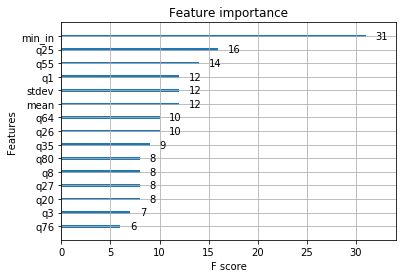

In [100]:
plot_importance(tuned_model,max_num_features=15)
pyplot.show

### Performance Plot

In [101]:
epochs = len(cv_result['test-logloss-mean'])
x_axis = range(0, epochs)

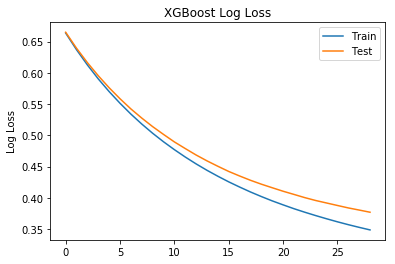

In [102]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, cv_result['train-logloss-mean'], label='Train')
ax.plot(x_axis, cv_result['test-logloss-mean'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

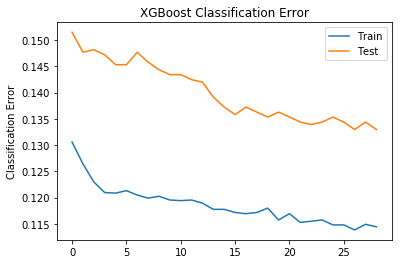

In [103]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, cv_result['train-error-mean'], label='Train')
ax.plot(x_axis, cv_result['test-error-mean'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

## Accuracy Score Analysis

### General Performance Score

In [31]:
# prob predict
y_pred = tuned_model.predict(xg_test)
print(len(y_pred))

655


In [37]:
# Classification prediction
y_pred_class = []
for i in range(len(y_pred)):
    if y_pred[i]>0.5:
        y_pred_class.append(1)
    elif y_pred[i]<=0.5:
        y_pred_class.append(0)
y_pred_class[1:10]    

[1, 0, 1, 0, 1, 1, 1, 0, 1]

In [39]:
accuracy_score(y_test,y_pred_class)

0.88854961832061063

In [42]:
print(classification_report(y_test,y_pred_class,target_names=["female","male"]))

             precision    recall  f1-score   support

     female       0.75      0.88      0.81       173
       male       0.95      0.89      0.92       482

avg / total       0.90      0.89      0.89       655



### Threshold Performance Measures

In [43]:
bi_pred = []
filter_test = []
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        bi_pred.append(1)
        filter_test.append(y_test.iloc[i])
    elif y_pred[i] <= 0.5:
        bi_pred.append(0)
        filter_test.append(y_test.iloc[i])

series_pred = pd.Series(bi_pred)
series_test = pd.Series(filter_test)
print(len(series_pred))
result = pd.crosstab(series_test, series_pred, rownames=["Actual"], colnames=["Predicted"])
result

655


Predicted,0,1
Actual,,
0,152,21
1,52,430


# Probability of Being Male Analysis

## Import and Predict un-predicted observations

In [74]:
data = pd.read_csv("ML_dataset_0930.csv")
data.head()

,Unnamed: 0,filename,lawyer_male,percent,max,min,mean,median,stdev,min_in,...,q91,q92,q93,q94,q95,q96,q97,q98,q99,q100
0,1,120222015200547280299,1,0.0,258.11872,105.42314,130.2302,124.03377,29.27223,21.75107,...,136.41411,137.44948,139.11002,150.97418,233.89897,242.42514,253.86877,255.11467,255.86677,259.05867
1,2,12022237318030335018,1,0.0,341.0521,174.30794,229.27221,222.32459,36.14343,28.10591,...,283.20606,284.65229,285.03504,285.14059,294.86228,306.1213,311.62433,318.55998,327.6212,344.57995
2,3,12022237340030114014,1,0.0,190.87783,81.00901,111.19673,108.17011,21.815,28.75928,...,139.80518,141.01955,146.64117,148.4232,150.16875,159.46629,173.48027,175.95107,182.00563,193.21693
3,4,12022237343030224016,1,0.0,133.90526,89.74382,108.61958,105.47788,11.86239,19.00371,...,128.21476,129.12292,130.28582,131.14202,131.73361,132.17219,132.43985,132.61862,132.68908,134.46538
4,5,12022237352030003012,1,0.0,244.77814,51.16954,103.40267,97.34576,23.43879,21.67640,...,128.58647,130.42046,131.86908,132.25946,132.85974,133.49579,133.96456,160.30325,244.39978,244.78109


In [46]:
# select and predict the un-predicted observations
unpredict_obs = xgb.DMatrix(X_test,label=y_test)
prob_male_pred = tuned_model.predict(unpredict_obs)

In [71]:

result_dic = {"gender":y_test,"prob_male":prob_male_pred}
prob_df = pd.DataFrame.from_dict(result_dic)